In [96]:
from scipy import misc
import numpy as np
from scipy.fftpack import dct
from skimage.color import rgb2lab, lab2rgb
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
calBlue = misc.imread('images/calBlue.tiff')
Marconi = misc.imread('images/Marconi.tiff')
createrLake = misc.imread('images/createrLake.tiff')
Isee = misc.imread('images/Isee.tiff')
pauly = misc.imread('images/pauly.tiff')

In [100]:
rgb2lab

<function skimage.color.colorconv.rgb2lab>

In [101]:
luminance_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],\
                            [12, 12, 14, 19, 26, 58, 60, 55],\
                            [14, 13, 16, 24, 40, 57, 69, 56],\
                            [14, 17, 22, 29, 51, 87, 80, 62],\
                            [18, 22, 37, 56, 68, 109, 103, 77],\
                            [24, 36, 55, 64, 81, 104, 113, 92],\
                            [49, 64, 78, 87, 103, 121, 120, 101],\
                            [72, 92, 95, 98, 112, 100 ,103, 99]])

chrominance_table = np.array([[17, 18, 24, 47, 99, 99, 99, 99],\
                                [18, 21, 26, 66, 99, 99, 99, 99],\
                                [24, 26, 56, 99, 99, 99, 99, 99],\
                                [47, 66, 99, 99, 99, 99, 99, 99],\
                                [99, 99, 99, 99, 99, 99, 99, 99],\
                                [99, 99, 99, 99, 99, 99, 99, 99],\
                                [99, 99, 99, 99, 99, 99, 99, 99],\
                                [99, 99, 99, 99, 99, 99, 99, 99]])

uint8


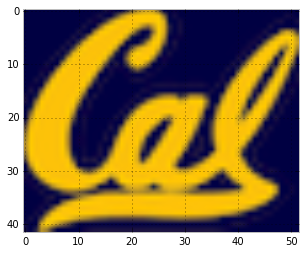

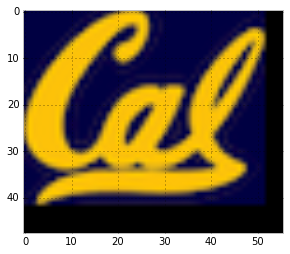

In [211]:
def zeropad_image(V):
    def roundup(x):
        return int(math.ceil(x * 1.0 / 8)) * 8
    rows, cols = roundup(V.shape[0]), roundup(V.shape[1])
    zeros = np.zeros((rows, cols, 3), dtype='uint8')
    zeros[:V.shape[0], :V.shape[1], :] = V
    return zeros

# print calBlue[:,:,0].shape
plt.imshow(calBlue)
print calBlue.dtype
plt.show()
plt.imshow(zeropad_image(calBlue))
plt.show()

In [213]:
O = zeropad_image(calBlue)
O = rgb2lab(O)
O[:,:,[1,2]] += 128

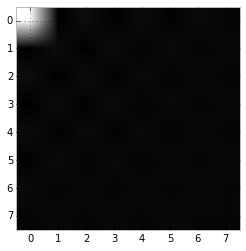

In [229]:
def block_channel(V):
    l = []
    for i in np.arange(0,V.shape[0], 8):
        for j in np.arange(0, V.shape[1], 8):
            l.append(V[i:i+8, j:j+8, :])
    return l

for i in range(42):
    pass #plt.imshow(block_channel(O)[i]); plt.show()

def dct_2d(X):
    return dct(dct(X, axis=0), axis=1)

def dct_all(X):
    blocks = block_channel(X)
    l = []
    for b in blocks:
        l.append(dct_2d(b))
    return l

blocked_image = block_channel(O)
plt.imshow(dct_2d(blocked_image[0])[:,:,0], cmap='Greys_r'); plt.show()

In [238]:
def quantize(DCT_coeffs, q):
    def a(q):
        assert q in range(1,101)
        if q in range(1, 51):
            return 50.0/q
        else:
            return 2-q*1.0/50
    alpha = a(q)
    
    for i in range(len(DCT_coeffs)):
        np.round(DCT_coeffs[i][:,:,0]*1.0/(alpha*luminance_table))
        np.round(DCT_coeffs[i][:,:,1]*1.0/(alpha*chrominance_table))
        np.round(DCT_coeffs[i][:,:,2]*1.0/(alpha*chrominance_table))
    
dct_2d(np.ones((8,8))*255)

array([[ 65280.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.]])

In [231]:
all1 = dct_all(O)

In [234]:
quantize(all1, 0.5)

array([[ 58.,  -2.,   2.,  -1.,   1.,  -0.,   0.,  -0.],
       [ -2.,   2.,  -2.,   1.,  -1.,   0.,  -0.,   0.],
       [  2.,  -2.,   1.,  -1.,   0.,  -0.,   0.,  -0.],
       [ -1.,   1.,  -1.,   1.,  -0.,   0.,  -0.,   0.],
       [  1.,  -1.,   0.,  -0.,   0.,  -0.,   0.,  -0.],
       [ -1.,   0.,  -0.,   0.,  -0.,   0.,  -0.,   0.],
       [  0.,  -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.],
       [ -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.,   0.]])